In [ ]:
# Makes plots of retrieved Teff and Fe/H of McDonald data

# Created 2021 Nov. 3 by E.S

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ew_file = "~/Documents/git.repos/rrlyrae_metallicity/bin/retrieved_vals_McDonald_data_20211103.csv"

In [3]:
df = pd.read_csv(ew_file)

In [4]:
df

,realization_spec_file_name,orig_spec_file_name,EW_Hbeta,err_EW_Hbeta_from_robo,EW_Hdelta,err_EW_Hdelta_from_robo,EW_Hgamma,err_EW_Hgamma_from_robo,EW_Heps,err_EW_Heps_from_robo,EW_CaIIK,err_EW_CaIIK_from_robo,EW_Balmer,err_EW_Balmer_based_Robo,err_EW_Balmer_based_noise_churning,feh_retrieved,err_feh_retrieved,teff_retrieved
0,AR_Per_01_noise_ver_000.dat,AR_Per_01.dat,5.513239,1.479734,3.749249,1.237012,4.108165,0.942799,8.923473,2.437342,8.669427,1.919832,3.225460,1.278393,0.0,-1.100447,0.020949,6112.013823
1,AR_Per_02_noise_ver_000.dat,AR_Per_02.dat,6.621519,2.021362,3.667108,1.045790,4.229278,1.399172,8.458081,1.800801,8.557880,1.887103,3.352853,1.866804,0.0,-1.094920,0.020787,6135.909758
2,AR_Per_03_noise_ver_000.dat,AR_Per_03.dat,5.100430,1.700019,3.612964,1.289192,4.174086,1.609951,8.050307,1.841850,7.225012,1.539262,3.294799,2.154375,0.0,-1.321644,0.030430,6125.020222
3,AR_Per_05_noise_ver_000.dat,AR_Per_05.dat,11.653250,2.322511,10.784656,2.251324,11.701739,2.526311,12.191882,2.257033,3.662642,0.819297,11.212793,2.785606,0.0,-0.713514,0.036112,7610.247267
4,AR_Per_06_noise_ver_000.dat,AR_Per_06.dat,10.176606,2.086091,9.673037,1.911386,10.475344,2.458238,10.892135,2.077674,4.010492,0.875669,9.922804,2.740707,0.0,-0.827487,0.017193,7368.276095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,X_Ari__05_noise_ver_000.dat,X_Ari__05.dat,3.809181,2.269934,4.487566,1.353637,4.281357,1.370123,4.984885,1.589008,1.999938,0.384847,3.407633,1.821295,0.0,-2.508599,0.018880,6146.185091
156,X_Ari__06_noise_ver_000.dat,X_Ari__06.dat,4.416311,1.817211,3.958759,1.458727,4.434431,1.400545,4.655098,1.254918,1.958632,0.371732,3.568644,1.840998,0.0,-2.506315,0.018461,6176.387020
157,X_Ari__08_noise_ver_000.dat,X_Ari__08.dat,9.771492,2.239847,11.470134,1.922272,12.284994,2.749878,11.874163,2.172955,0.895361,0.132050,11.826292,3.016885,0.0,-2.130022,0.102680,7725.325114
158,X_Ari__09_noise_ver_000.dat,X_Ari__09.dat,3.936452,2.457251,3.866325,0.949845,4.435529,1.697552,4.941678,1.534291,2.118065,0.436147,3.569799,2.227215,0.0,-2.449497,0.016033,6176.603659


In [5]:
# add new column to separate out stars

df["star"] = df['orig_spec_file_name'].str.replace('\d+', '').str.split(".").str[0]

In [6]:
df.keys()

Index(['realization_spec_file_name', 'orig_spec_file_name', 'EW_Hbeta',
       'err_EW_Hbeta_from_robo', 'EW_Hdelta', 'err_EW_Hdelta_from_robo',
       'EW_Hgamma', 'err_EW_Hgamma_from_robo', 'EW_Heps',
       'err_EW_Heps_from_robo', 'EW_CaIIK', 'err_EW_CaIIK_from_robo',
       'EW_Balmer', 'err_EW_Balmer_based_Robo',
       'err_EW_Balmer_based_noise_churning', 'feh_retrieved',
       'err_feh_retrieved', 'teff_retrieved', 'star'],
      dtype='object')

In [7]:
unique_star_names = df["star"].drop_duplicates().values

In [8]:
df["teff_retrieved"].min()

6112.013823483099

In [9]:
df["teff_retrieved"].max()

7828.1342782469765

In [20]:
bin_widths = 250.*np.arange(0,21)+5000
for star_name in range(0,len(unique_star_names)):
    
    print("------")
    print(unique_star_names[star_name])
    print(len(df["teff_retrieved"].where(df["star"] == unique_star_names[star_name]).dropna()))


    # individual stars
    plt.hist(df["teff_retrieved"].where(df["star"] == unique_star_names[star_name]), 
             bins=bin_widths)

    '''
    # all together
    plt.hist(df["teff_retrieved"],bins=bin_widths)
    '''
    
    plt.axvline(x=5900, linestyle="--", color="gray")
    plt.axvline(x=7350, linestyle="--", color="gray")
    
    plt.xlim([5000,10000])
    plt.xlabel("Teff retrieved (K)")
    plt.title(unique_star_names[star_name])
    plt.savefig("junk_test_hist_" + unique_star_names[star_name] + ".pdf")
    plt.clf()

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-20-3fb9dc8cf736>, line 24)

In [ ]:
plt.savefig("test_hist_all_together.pdf")

In [21]:
bin_widths = 0.1*np.arange(0,36)-3.0
plt.clf()
for star_name in range(0,len(unique_star_names)):

    plt.hist(df["feh_retrieved"].where(df["star"] == unique_star_names[star_name]), 
             bins=bin_widths)
    
    #plt.axvline(x=5900, linestyle="--", color="gray")
    #plt.axvline(x=7350, linestyle="--", color="gray")
    
    #plt.xlim([5000,10000])
    plt.xlabel("Fe/H retrieved (K)")
    plt.title(unique_star_names[star_name])
    plt.savefig("test_hist_feh_" + unique_star_names[star_name] + ".pdf")
    plt.clf()

<Figure size 432x288 with 0 Axes>

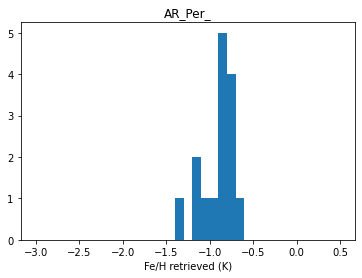

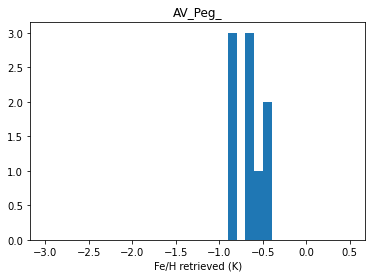

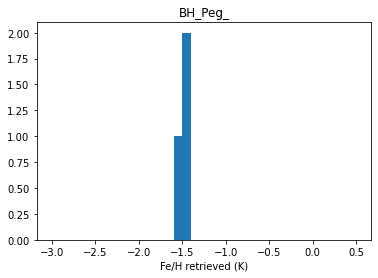

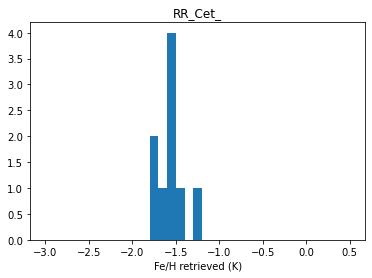

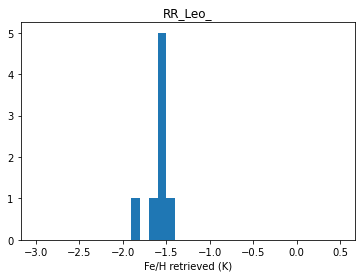

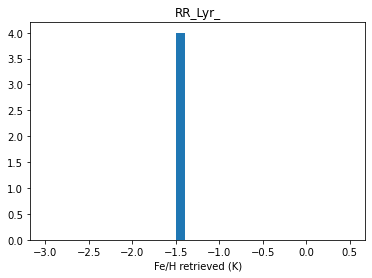

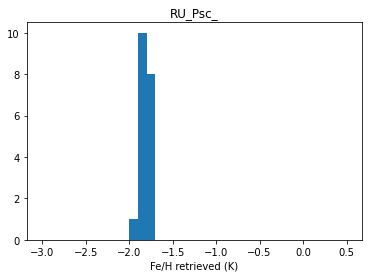

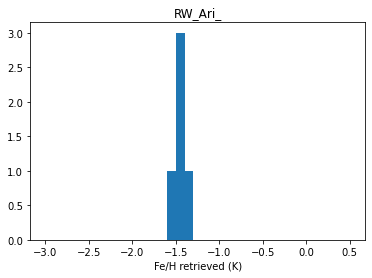

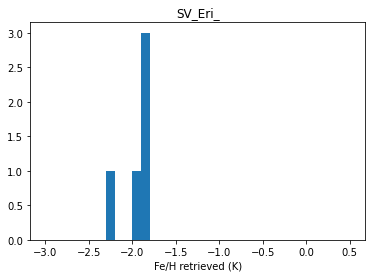

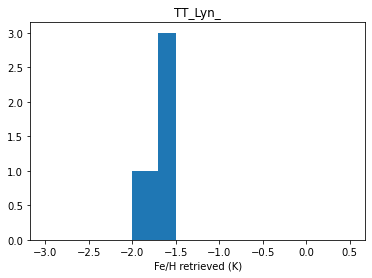

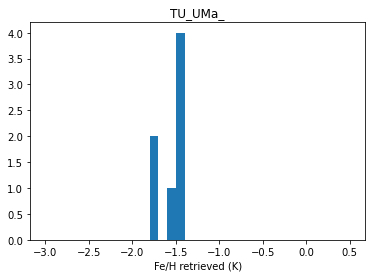

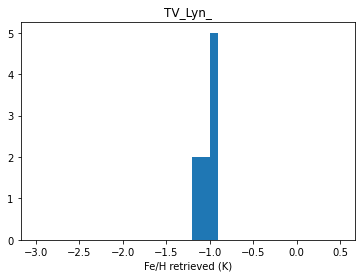

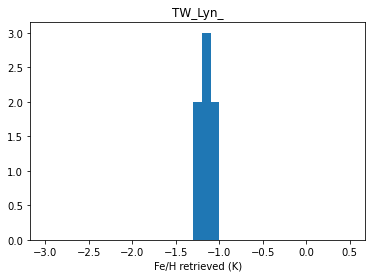

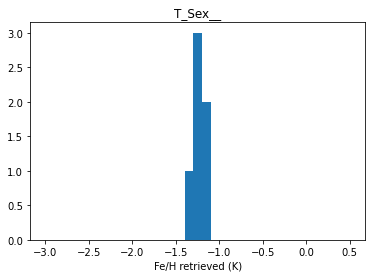

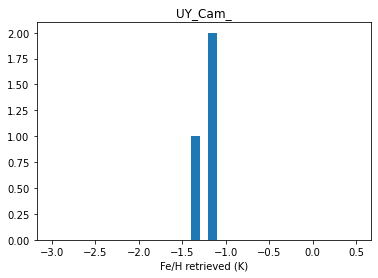

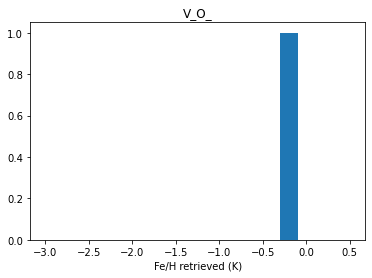

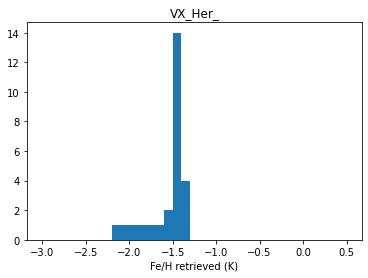

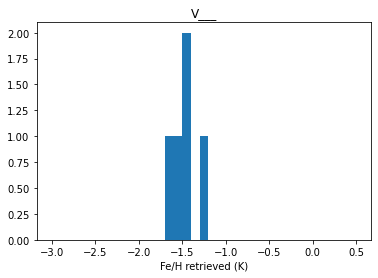

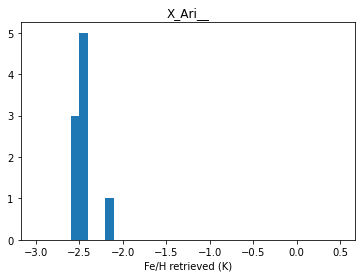

In [11]:
bin_widths = 0.1*np.arange(0,36)-3.0
plt.clf()
for star_name in range(0,len(unique_star_names)):

    plt.hist(df["feh_retrieved"].where(df["star"] == unique_star_names[star_name]), 
             bins=bin_widths)
    
    #plt.axvline(x=5900, linestyle="--", color="gray")
    #plt.axvline(x=7350, linestyle="--", color="gray")
    
    #plt.xlim([5000,10000])
    plt.xlabel("Fe/H retrieved (K)")
    plt.title(unique_star_names[star_name])
    plt.show()

In [53]:
df["feh_retrieved"].max()

0.2711162669838131